# Расчетное задание №1. Вариант 4. Захаренко Вадим 2021-ФГиИБ-ПИ-1б

Параметры, необходимые для расчета (варинат 4):


*   Класс 1: P1 = 0.2, m1 = 8, d1 = 2
*   Класс 2: P2 = 0.4, m2 = 12, d1 = 1
*   Класс 3: P3 = 0.4, m3 = 17, d3 = 3


# Выполнение работы.

# 1. Найти все разделяющие точки для пар K1-K2, K1-K3, K2-K3.

Для начала необходимо определить функции правдоподобия для каждого класса. Функция правдоподобия для нормально распределённой случайной величины выражается через её плотность вероятности, умноженную на априорную вероятность класса. Для нормального распределения с параметрами $m$ (среднее значение) и $d$ (стандартное отклонение) функция плотности вероятности $f(x)$ имеет вид:

$f(x) = \frac{1}{\sqrt{2\pi} d} e^{-\frac{(x-m)^2}{2d^2}}$

Тогда функция правдоподобия для класса $i$ будет:

$P_i(x) = P_i \cdot \frac{1}{\sqrt{2\pi} d_i} e^{-\frac{(x-m_i)^2}{2d_i^2}}$

Чтобы найти разделяющие точки между классами, нужно решить уравнение, приравнивая функции правдоподобия двух классов. Например, для точек между классами 1 и 2 уравнение будет:

$P_1 \cdot \frac{1}{\sqrt{2\pi} d_1} e^{-\frac{(x-m_1)^2}{2d_1^2}} = P_2 \cdot \frac{1}{\sqrt{2\pi} d_2} e^{-\frac{(x-m_2)^2}{2d_2^2}}$

После логарифмирования и упрощения получится квадратное уравнение относительно $x$, которое можно решить для нахождения разделяющих точек. Аналогично поступаем для классов 2 и 3.

Приступим к нахождению разделяющих точек.

Для этого будем использовать Python, библиотеку Scipy. Из библиотеки Scipy будем использовать функцию fsolve, которая позволяет решать системы нелинейных уравнений численно.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.stats import norm

P1, m1, d1 = 0.2, 8, 2
P2, m2, d2 = 0.4, 12, 1
P3, m3, d3 = 0.4, 17, 3


def likelihood(x, P, m, d):
    return P * norm.pdf(x, m, d)

def likelihood_class_1(x):
    return likelihood(x, P1, m1, d1)

def likelihood_class_2(x):
    return likelihood(x, P2, m2, d2)

def likelihood_class_3(x):
    return likelihood(x, P3, m3, d3)

def find_intersection(f1, f2, x0):
    return fsolve(lambda x: f1(x) - f2(x), x0)

initial_guess_1_2 = (m1 + m2) / 2
initial_guess_1_3 = (m1 + m3) / 2
initial_guess_2_3 = (m2 + m3) / 2

intersection_1_2 = find_intersection(likelihood_class_1, likelihood_class_2, initial_guess_1_2)
intersection_1_3 = find_intersection(likelihood_class_1, likelihood_class_3, initial_guess_1_3)
intersection_2_3 = find_intersection(likelihood_class_2, likelihood_class_3, initial_guess_2_3)

print('Разделяющие точки между классами 1 и 2:', intersection_1_2[0])
print('Разделяющие точки между классами 1 и 3:', intersection_1_3[0])
print('Разделяющие точки между классами 2 и 3:', intersection_2_3[0])

Разделяющие точки между классами 1 и 2: 10.045796858388206
Разделяющие точки между классами 1 и 3: 11.406478122199399
Разделяющие точки между классами 2 и 3: 13.8219374020402


# 2. Построить график функции прадоподобия $P_if(m_i,d_i)$.

Для построяния графика функции правдоподобия также будем использовать Python, но на этот раз библиотеку Matplotlib, предназначенную как раз таки для построения графиков.

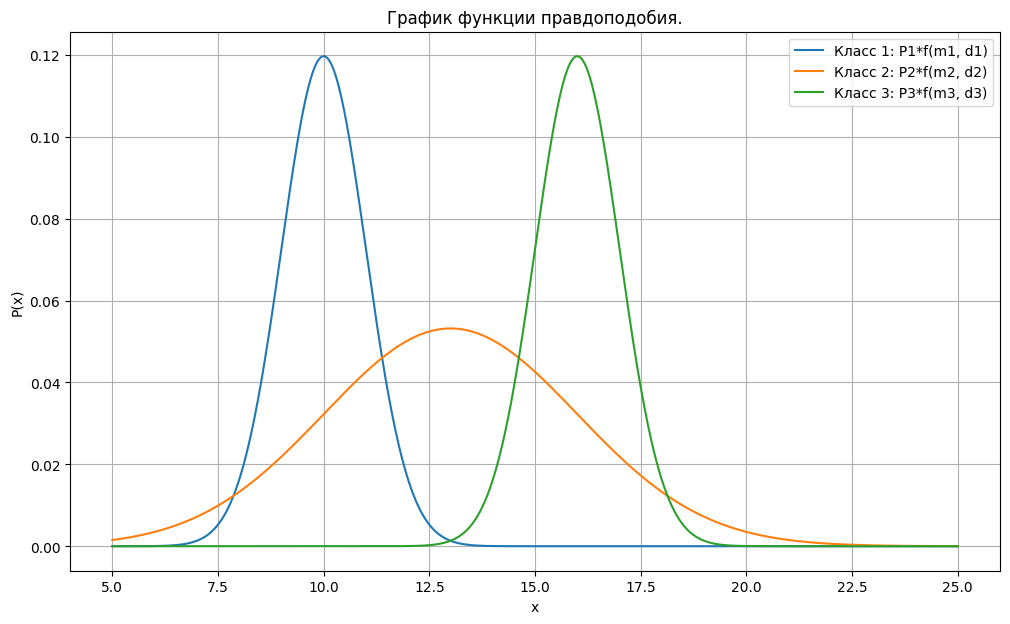

In [5]:
x = np.linspace(5, 25, 1000)

P1_x = likelihood(x, P1, m1, d1)
P2_x = likelihood(x, P2, m2, d2)
P3_x = likelihood(x, P3, m3, d3)

plt.figure(figsize=(12, 7))
plt.plot(x, P1_x, label='Класс 1: P1*f(m1, d1)')
plt.plot(x, P2_x, label='Класс 2: P2*f(m2, d2)')
plt.plot(x, P3_x, label='Класс 3: P3*f(m3, d3)')
plt.title('График функции правдоподобия.')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Указать на графике все полученные **разделяющие точки**.

In [3]:
class1_region = x[x < intersection_1_2]
class2_region = x[(x >= intersection_1_2) & (x < intersection_2_3)]
class3_region = x[x >= intersection_2_3]

plt.figure(figsize=(12, 7))
plt.plot(x, likelihood(x, P1, m1, d1), label='Класс 1: P1*f(m1, d1)')
plt.plot(x, likelihood(x, P2, m2, d2), label='Класс 2: P2*f(m2, d2)')
plt.plot(x, likelihood(x, P3, m3, d3), label='Класс 3: P3*f(m3, d3)')
plt.fill_between(class1_region, likelihood(class1_region, P1, m1, d1), alpha=0.3)
plt.fill_between(class2_region, likelihood(class2_region, P2, m2, d2), alpha=0.3)
plt.fill_between(class3_region, likelihood(class3_region, P3, m3, d3), alpha=0.3)

plt.title('График функции правдоподобия с разделяющими точками')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid(True)

plt.scatter(intersection_1_2, likelihood(intersection_1_2, P2, m2, d2), color='black', zorder=5, label='Decision Boundary')
plt.scatter(intersection_1_3, likelihood(intersection_1_3, P1, m1, d1), facecolors='none', edgecolors='black', zorder=5, marker='o')
plt.scatter(intersection_2_3, likelihood(intersection_2_3, P3, m3, d3), color='black', zorder=5)
plt.show()

На графике показаны функции правдоподобия для всех трех классов с закрашенными областями решений:

* Синяя область соответствует классу 1 и ограничена справа разделяющей точкой $x≈11.38$.
* Оранжевая область соответствует классу 2 и находится между разделяющими точками $x≈11.38$ и $x≈14.61$.
* Зеленая область соответствует классу 3 и начинается от разделяющей точки $x≈14.61$ и продолжается вправо.

Черные точки обозначают разделяющие границы между классами (определяют область решений). Выколотая точка не определяет область решений.

# 4. Выбрать точки, соотвествующие границам классов, и записать ответ в виде отрезков (или полуинтервалов), соответсвующих каждому из трех классов.

Исходя из найденных точек разделения и ориентируясь по графику, мы можем определить следующие границы для классов:
* Класс 1:
$(0, 10.05)$ – значения меньше первой разделяющей точки.
* Класс 2:
$[10.05,13.82)$ – значения от первой до второй разделяющей точки.
* Класс 3:
$[13.82,+∞)$ – значения больше второй разделяющей точки.

Эти интервалы представляют собой отрезки или полуинтервалы, на которых классификатор будет принимать решение о принадлежности к определенному классу. Если значение x попадает в один из этих интервалов, то оно классифицируется соответственно.